<a href="https://colab.research.google.com/github/bchuchucaa/Simulacion/blob/main/SimPrueba1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("LIBRERIAS IMPORTADAS")

LIBRERIAS IMPORTADAS


# Lectura de los datos
Para este estudio hemos tomados los datos proporcionados por el Gobierno acerca del empleo en el Ecuador, asi como la sectorizacion [Urbana,Rural]

In [2]:
poblacion= pd.read_csv('/content/1.Poblaciones.csv',encoding= 'unicode_escape',delimiter=";",header=2)
poblacion.rename(columns = {'Unnamed: 0':'Encuesta','Unnamed: 1':'Periodo','Unnamed: 2':'Indicadores','Urbana':'A.Urbana','Rural':'A.Rural'}, inplace = True)
poblacion= poblacion[["Encuesta","Periodo","Indicadores","Total","A.Urbana","A.Rural","Hombre","Mujer"]]



Lectura de datos de la sectorizacion, ademas se divide las categorias para un mejor manejo de los datos.

In [3]:
sectorizacion_df = pd.read_csv('/content/4. Sectorizacion delempleo.csv', error_bad_lines=False ,sep=';' , encoding='latin-1' ) 
sectorizacion_df.iloc[1:5].fillna("Nacional", inplace = True) 
sectorizacion_df.iloc[1:9].fillna("Urbano", inplace = True) 
sectorizacion_df.iloc[1:].fillna("Rural", inplace = True)
sectorizacion_df=sectorizacion_df.replace('\%','',regex=True)
sectorizacion_df.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Característica,Unnamed: 1,jun-07,sep-07,dic-07,mar-08,jun-08,sep-08,dic-08,mar-09,jun-09,sep-09,dic-09,mar-10,jun-10,sep-10,dic-10,mar-11,jun-11,sep-11,dic-11,mar-12,jun-12,sep-12,dic-12,mar-13,jun-13,sep-13,dic-13,mar-14,jun-14,sep-14,dic-14,mar-15,jun-15,sep-15,dic-15,mar-16,jun-16,sep-16,dic-16,mar-17,jun-17,sep-17,dic-17,mar-18,jun-18,sep-18,dic-18,mar-19,jun-19,sep-19,dic-19,sep-20,oct-20,nov-20,dic-20,ene-21,feb-21,mar-21,abr-21,may-21,jun-21,jul-21,ago-21,sep-21,oct-21
0,Nacional,Sector Formal,-,-,"41,00",-,"42,50",-,"43,90",-,-,-,"43,70",-,"44,90",-,"47,20",-,"46,30",-,"46,50",-,"47,40",-,"48,70",-,"47,60",-,"49,30","48,70","50,90","51,20","50,90","49,90","51,20","50,60","50,50","48,70","49,00","47,70","47,60","47,00","47,90","47,40","48,90","48,30","46,00","46,80","46,20","45,70","45,90","46,50","44,70","41,60","42,60","41,00","40,90","41,90","41,40","42,10","39,90","39,70","42,30","40,60","41,20","43,90","41,40"
1,Nacional,Sector Informal,-,-,"45,10",-,"45,40",-,"43,50",-,-,-,"43,80",-,"42,30",-,"42,80",-,"42,20",-,"42,70",-,"41,40",-,"40,80",-,"43,20",-,"40,10","41,80","38,90","41,40","39,70","42,10","39,30","40,60","40,40","43,00","43,00","44,50","43,70","45,60","45,00","46,40","44,10","45,00","47,50","46,20","46,20","46,70","46,30","46,70","46,70","52,50","52,10","52,80","51,60","51,00","49,90","50,90","52,70","52,70","49,90","51,20","50,60","49,20","52,20"
2,Nacional,Empleo Doméstico,-,-,"3,30",-,"3,30",-,"3,50",-,-,-,"3,40",-,"3,40",-,"2,90",-,"3,00",-,"2,30",-,"2,70",-,"2,50",-,"2,60",-,"3,10","3,20","2,70","2,60","3,20","2,70","2,70","2,50","2,70","2,50","2,70","2,60","2,80","2,80","2,80","2,70","2,50","2,60","2,60","2,70","2,90","2,80","2,60","2,60","3,00","1,90","1,50","2,00","2,60","1,80","1,90","1,90","1,90","2,00","2,00","2,10","2,40","2,40","2,20"
3,Nacional,No Clasificados por Sector,-,-,"10,60",-,"8,80",-,"9,20",-,-,-,"9,10",-,"9,30",-,"7,10",-,"8,40",-,"8,40",-,"8,50",-,"8,00",-,"6,60",-,"7,50","6,30","7,40","4,90","6,20","5,30","6,80","6,30","6,50","5,80","5,30","5,30","6,00","4,50","4,30","3,40","4,50","4,10","3,90","4,30","4,80","4,80","5,20","4,30","5,60","4,00","3,80","4,20","4,90","5,40","6,80","5,10","5,50","5,60","5,80","6,20","5,80","4,50","4,20"
4,Urbano,Sector Formal,"54,70","55,70","54,10","54,40","55,80","56,00","56,20","57,40","57,70","59,40","57,30","57,50","58,60","59,40","60,80","59,90","60,50","61,00","59,90","63,10","61,60","61,60","62,50","61,20","61,90","62,00","61,90","61,00","63,00","63,60","60,60","61,30","62,60","61,00","60,80","59,60","60,40","58,20","56,60","57,90","58,70","57,30","59,20","59,00","57,50","58,80","57,30","57,40","56,90","57,30","56,30","51,80","53,50","52,80","51,20","53,70","51,90","51,30","50,90","50,70","52,50","50,70","52,10","54,30","52,50"
5,Urbano,Sector Informal,"36,90","36,10","34,00","36,60","34,00","35,00","33,20","34,00","32,80","31,60","32,60","33,00","30,90","33,00","31,20","32,00","30,70","31,30","32,50","31,40","29,20","30,60","29,80","32,10","30,80","31,50","29,80","31,30","29,50","29,80","30,90","32,20","29,10","31,80","31,30","32,60","32,40","34,30","35,20","34,90","34,20","36,50","34,30","34,50","36,00","34,20","34,90","34,70","34,90","35,80","34,90","42,10","40,90","41,30","41,10","38,70","39,40","41,10","41,80","41,00","38,80","40,50","39,60","37,90","40,20"
6,Urbano,Empleo Doméstico,"4,00","4,10","4,30","3,90","4,00","3,90","4,20","3,70","4,00","3,80","4,10","4,10","4,20","3,50","3,40","3,90","3,80","3,60","2,70","2,90","3,30","3,10","2,90","2,50","3,10","3,20","3,60","3,50","3,10","3,10","3,80","3,10","3,30","3,00","3,20","3,20","3,40","3,10","3,30","3,70","3,60","3,40","3,00","3,30","3,30","3,50","3,60","3,50","3,30","3,30","3,70","2,50","2,00","2,40","3,30","2,40","2,50","2,40","2,50","2,70","2,30","2,60","3,10","3,00","2,80"
7,Urbano,No Clasificados por Sector,"4,40","4,10","7,70","5,10","6,20","5,10","6,40","4,80","5,50","5,10","6,00","5,40","6,20","4,10","4,60","4,20","5,00","4,10","4,80","2,50","5,90","4,60","4,90","4,20","4,20"

# Preprocesamiento

Verificamos que el dataset no contenga valores nulos, en este caso nos dio 0 por lo cual no tenemos ausencia de valores en la data.


In [4]:
print('Valores nulos en la data',poblacion.isnull().sum().sum())

Valores nulos en la data 0


Visualizamos la cabecera del dataset resultante

In [5]:
poblacion.head()

,Encuesta,Periodo,Indicadores,Total,A.Urbana,A.Rural,Hombre,Mujer
0,ENEMDU,dic-07,Población Total,13.682.302,9.066.209,4.616.093,6.768.646,6.913.656
1,ENEMDU,dic-07,Población menor de 15 años,4.372.812,2.723.124,1.649.688,2.226.618,2.146.194
2,ENEMDU,dic-07,Población en Edad de Trabajar (PET),9.309.490,6.343.085,2.966.404,4.542.028,4.767.462
3,ENEMDU,dic-07,Población Económicamente Activa,6.336.029,4.227.702,2.108.328,3.777.232,2.558.798
4,ENEMDU,dic-07,Empleo,6.019.332,3.971.040,2.048.292,3.632.314,2.387.018


## Formateamos la fecha del dataset

In [6]:
meses={"ene":"jan","feb":"feb","mar":"mar","abr":"apr","may":"may","jun":"jun","jul":"jul","ago":"aug","sep":"sep","oct":"oct","nov":"nov","dic":"dec"}
for i in range(len(poblacion)):
  month_name=str(poblacion.Periodo.iloc[i]).split('-')[0]
  month_name= meses.get(month_name)
  datetime_object = datetime.datetime.strptime(month_name, "%b")
  month_number = datetime_object.month
  year=str(poblacion.Periodo.iloc[i]).split('-')[1]
  date_formated=("20"+str(year)+"-"+str(month_number)+"-01")
  poblacion.Periodo.iloc[i]=date_formated
  

Transormamos las fechas a un formato manejable dentro de python year/month/day

In [7]:
poblacion['Periodo'] = pd.to_datetime(poblacion['Periodo'],format='%Y-%m-%d')
poblacion['Total'] = poblacion['Total'].str.replace(r'.', '')
poblacion['Total']=poblacion["Total"].astype(int)

Visualizamos la fecha de inicio y fin de las muestras que tenemos como referencias

In [8]:
print(poblacion.Periodo.min())
print(poblacion.Periodo.max())

2007-12-01 00:00:00
2021-10-01 00:00:00


Obtenemos una lista que nos ayudara a seleccionar las columnas de interes dentro del dataframe

In [9]:
poblacion.Indicadores.unique()

array(['Población Total', 'Población menor de 15 años',
       'Población en Edad de Trabajar (PET)',
       'Población Económicamente Activa', 'Empleo',
       'Empleo Adecuado/Pleno', 'Subempleo',
       'Subempleo por insuficiencia de tiempo de trabajo',
       'Subempleo por insuficiencia de ingresos', 'Empleo no remunerado',
       'Otro Empleo no pleno', 'Empleo no clasificado', 'Desempleo',
       'Desempleo Abierto', 'Desempleo Oculto', 'Desempleo Cesante',
       'Desempleo Nuevo', 'Población Económicamente Inactiva',
       'Población Total '], dtype=object)

Seleccionamos las categorias en cuestion: categorias de empleo y desempleo.
Como podemos observar existen varias categorias dentro del empleo y desempleo que se pueden observar en la siguiente celda de ejecucion.

In [10]:
cat_empleo=['Empleo',
       'Empleo Adecuado/Pleno', 'Subempleo',
       'Subempleo por insuficiencia de tiempo de trabajo',
       'Subempleo por insuficiencia de ingresos', 'Empleo no remunerado',
       'Otro Empleo no pleno', 'Empleo no clasificado']
cat_desempleo=['Desempleo',
       'Desempleo Abierto', 'Desempleo Oculto', 'Desempleo Cesante',
       'Desempleo Nuevo']
pob_empleada=poblacion.loc[poblacion['Indicadores'].isin(cat_empleo)]
pob_desempleada=poblacion.loc[poblacion['Indicadores'].isin(cat_desempleo)]

Usamos las series de tiempo para organizar el dataframe en referencia a la fecha

In [11]:
#Dataframe con datos de las personas empleadas
pob_empleada = pob_empleada.set_index("Periodo")
pob_empleada = pd.DataFrame(pob_empleada)

Seteamos el indice del dataframe con la fecha de las muestras.

In [12]:
#Dataframe con datos de las personas desempleadas
pob_desempleada = pob_desempleada.set_index("Periodo")
pob_desempleada = pd.DataFrame(pob_desempleada)

In [13]:
resume_employed=pob_empleada[pob_empleada.index.month == 12]
resume_employed.head(5)

,Encuesta,Indicadores,Total,A.Urbana,A.Rural,Hombre,Mujer
Periodo,,,,,,,
2007-12-01,ENEMDU,Empleo,6019332,3.971.040,2.048.292,3.632.314,2.387.018
2007-12-01,ENEMDU,Empleo Adecuado/Pleno,2737158,2.236.440,500.719,1.907.451,829.707
2007-12-01,ENEMDU,Subempleo,1155872,687.714,468.158,679.118,476.753
2007-12-01,ENEMDU,Subempleo por insuficiencia de tiempo de trabajo,860315,519.627,340.688,474.355,385.960
2007-12-01,ENEMDU,Subempleo por insuficiencia de ingresos,295556,168.087,127.470,204.763,90.793


In [14]:
resume_unemployed=pob_desempleada[pob_desempleada.index.month == 12]
resume_unemployed.head(5)

,Encuesta,Indicadores,Total,A.Urbana,A.Rural,Hombre,Mujer
Periodo,,,,,,,
2007-12-01,ENEMDU,Desempleo,316697,256.662,60.036,144.918,171.780
2007-12-01,ENEMDU,Desempleo Abierto,193225,168.728,24.497,97.565,95.660
2007-12-01,ENEMDU,Desempleo Oculto,123472,87.934,35.539,47.353,76.119
2007-12-01,ENEMDU,Desempleo Cesante,190044,160.289,29.755,99.490,90.554
2007-12-01,ENEMDU,Desempleo Nuevo,126653,96.372,30.281,45.427,81.226


In [15]:
resume_employed=resume_employed.groupby(resume_employed.index)['Total'].sum()
resume_employed=pd.DataFrame(resume_employed)

In [16]:
resume_unemployed=resume_unemployed.groupby(resume_unemployed.index)['Total'].sum()
resume_unemployed=pd.DataFrame(resume_unemployed)

Obtenemos la grafica de empleo en el Ecuador a traves del tiempo 

In [17]:
import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=resume_employed.index, y=resume_employed['Total'])])
fig.update_layout(
    title={
        'text': "Evolucion del empleo en el Ecuador 🇪🇨",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="Tiempo en años",
    yaxis_title="Cantidad de empleados",)
plot3=fig
fig.show()

Obtenemos la grafica del desempleo en el Ecuador a traves del tiempo 

In [18]:
fig = go.Figure([go.Scatter(x=resume_unemployed.index, y=resume_unemployed['Total'])])
fig.update_layout(
    title={
        'text': "Evolucion del desempleo en el Ecuador 🇪🇨",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="Tiempo en años",
    yaxis_title="Cantidad de desempleados",)
fig.show()

Generar grafico de pie por personas basadas en la sectorizacion de empleo

In [19]:
columnas=[sectorizacion_df.iloc[0]]
nacional_df=sectorizacion_df.iloc[1:5]
urbano_df=sectorizacion_df.iloc[5:9] 
rural_df=sectorizacion_df.loc[9:]
nacional_df.columns=columnas
urbano_df.columns=columnas
rural_df.columns=columnas

In [38]:
rural_df.head()

,Nacional,Sector Formal,-,-,"41,00",-,"42,50",-,"43,90",-,-,-,"43,70",-,"44,90",-,"47,20",-,"46,30",-,"46,50",-,"47,40",-,"48,70",-,"47,60",-,"49,30","48,70","50,90","51,20","50,90","49,90","51,20","50,60","50,50","48,70","49,00","47,70","47,60","47,00","47,90","47,40","48,90","48,30","46,00","46,80","46,20","45,70","45,90","46,50","44,70","41,60","42,60","41,00","40,90","41,90","41,40","42,10","39,90","39,70","42,30","40,60","41,20","43,90","41,40"
9,Rural,Sector Informal,-,-,66.70,-,68.10,-,64.20,-,-,-,65.60,-,64.50,-,65.70,-,64.40,-,63.20,-,64.90,-,62.80,-,66.40,-,61.10,63.20,59.00,65.40,57.60,60.70,59.30,58.40,59.50,63.20,63.40,63.70,60.60,65.80,65.70,65.80,64.00,65.00,69.20,69.40,68.30,69.30,67.50,67.40,69.50,71.40,72.80,73.80,71.60,72.80,69.00,68.80,72.00,73.60,70.80,71.60,71.20,69.90,74.80
10,Rural,Empleo Doméstico,-,-,1.50,-,1.80,-,1.90,-,-,-,2.00,-,1.90,-,1.80,-,1.50,-,1.60,-,1.60,-,1.70,-,1.70,-,2.10,2.70,1.90,1.60,2.20,1.80,1.50,1.50,1.60,1.10,1.30,1.60,1.80,1.20,1.40,1.40,1.40,1.40,1.40,1.10,1.40,1.30,1.40,1.30,1.70,0.90,0.60,1.20,1.20,0.80,0.80,0.90,0.80,0.90,1.30,1.10,1.00,1.30,0.90
11,Rural,No Clasificados por Sector,-,-,16.30,-,13.90,-,14.80,-,-,-,15.20,-,15.20,-,11.90,-,15.10,-,15.60,-,13.50,-,14.30,-,11.10,-,13.20,10.60,13.90,7.80,9.30,9.00,10.20,10.40,10.10,8.20,8.20,7.10,7.90,6.30,5.90,4.80,6.50,5.90,5.10,6.00,5.90,5.70,5.70,5.50,6.50,4.70,4.10,5.40,5.80,5.70,8.10,5.10,7.10,5.60,4.80,6.10,6.70,3.90,3.90


In [40]:
#Eliminamos los datos dentro de las fechas que no tienen observaciones
#nacional_df=nacional_df.drop(columns=nacional_df.columns[(nacional_df == '-').any()])
#urbano_df=urbano_df.drop(columns=urbano_df.columns[(urbano_df == '-').any()])
rural_df=rural_df.drop(columns=rural_df.columns[(rural_df == '-').any()])

In [22]:
nacional_df=nacional_df.replace('\,','.',regex=True)
urbano_df=urbano_df.replace('\,','.',regex=True)
rural_df=rural_df.replace('\,','.',regex=True)

In [41]:
#nacional_df.iloc[:,2:] = nacional_df.iloc[:,2:].astype(float)
#urbano_df.iloc[:,2:] = urbano_df.iloc[:,2:].astype(float)
rural_df.iloc[:,2:] = rural_df.iloc[:,2:].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning:

indexing past lexsort depth may impact performance.

/usr/local/lib/python3.7/dist-packages/ipykernel/ipkernel.py:208: PerformanceWarning:

indexing past lexsort depth may impact performance.



In [42]:
rural_df.head()

,Nacional,Sector Formal,"41,00","42,50","43,90","43,70","44,90","47,20","46,30","46,50","47,40","48,70","47,60","49,30","48,70","50,90","51,20","50,90","49,90","51,20","50,60","50,50","48,70","49,00","47,70","47,60","47,00","47,90","47,40","48,90","48,30","46,00","46,80","46,20","45,70","45,90","46,50","44,70","41,60","42,60","41,00","40,90","41,90","41,40","42,10","39,90","39,70","42,30","40,60","41,20","43,90","41,40"
9,Rural,Sector Informal,66.7,68.1,64.2,65.6,64.5,65.7,64.4,63.2,64.9,62.8,66.4,61.1,62.8,59.0,65.4,59.0,60.7,65.4,58.4,59.5,62.8,63.4,63.7,66.4,65.8,65.7,64.9,64.0,65.0,69.2,69.4,68.3,69.3,67.5,63.2,69.5,71.4,72.8,66.7,71.6,72.8,69.0,68.8,72.0,73.6,70.8,71.6,71.2,64.2,69.0
10,Rural,Empleo Doméstico,1.5,1.8,1.9,2.0,1.9,1.8,1.5,1.6,1.6,1.7,1.7,2.1,1.7,1.9,1.6,1.9,1.8,1.6,1.5,1.6,1.7,1.3,1.6,1.7,1.2,1.4,1.6,1.4,1.4,1.4,1.1,1.4,1.3,1.4,1.6,1.7,0.9,0.6,1.5,1.2,0.8,0.8,0.9,0.8,0.9,1.3,1.1,1.0,1.9,0.8
11,Rural,No Clasificados por Sector,16.3,13.9,14.8,15.2,15.2,11.9,15.1,15.6,13.5,14.3,11.1,13.2,14.3,13.9,7.8,13.9,9.0,7.8,10.4,10.1,14.3,8.2,7.1,11.1,6.3,5.9,13.5,6.5,5.9,5.1,6.0,5.9,5.7,5.7,15.6,6.5,4.7,4.1,16.3,5.8,5.7,8.1,5.1,7.1,5.6,4.8,6.1,6.7,14.8,8.1


In [47]:
def graph_pastel(data,labels,title):
  colors = sns.color_palette('pastel')[0:5]
  plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
  plt.title(title)
  plt.show()


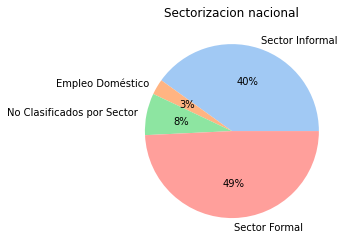

In [48]:
graph_pastel(nacional_df.iloc[:,3],nacional_df.iloc[:,1],'Sectorizacion nacional')

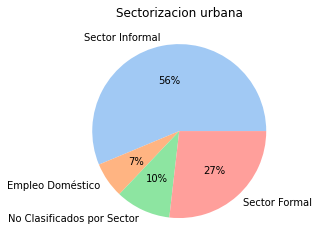

In [49]:
graph_pastel(urbano_df.iloc[:,3],urbano_df.iloc[:,1],'Sectorizacion urbana')

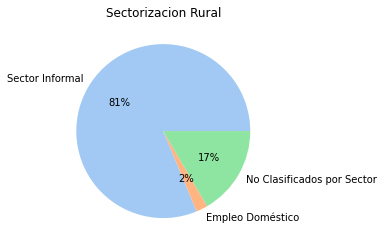

In [50]:
graph_pastel(rural_df.iloc[:,3],rural_df.iloc[:,1],'Sectorizacion Rural')

# Generar histogramas de subempleo, empleo pleno y empleo no pleno por anio*

Buscamos y seleccionamos las categorias mencionadas dentro del Dataframe para la visualizacion de los mismos

In [26]:
cat_empleo_selected=['Subempleo','Empleo Adecuado/Pleno','Otro Empleo no pleno']
empleados_category=poblacion.loc[poblacion['Indicadores'].isin(cat_empleo_selected)]
empleados_category=pd.DataFrame(empleados_category)

In [27]:
empleados_category=empleados_category.set_index('Periodo')
resume_empleados=empleados_category[empleados_category.index.month == 12]


In [28]:
resume_empleados=resume_empleados.groupby(resume_empleados.index)['Total'].sum()
resume_empleados=pd.DataFrame(resume_empleados)

In [29]:
#Parametrizacion de las fechas 
resume_empleados=resume_empleados.loc['2009-01-01':'2021-12-31']
fig = go.Figure([go.Scatter(x=resume_empleados.index, y=resume_empleados['Total'])])
fig.update_layout(
    title={
        'text': "Evolucion del desempleo en el Ecuador 🇪🇨",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="Tiempo en años",
    yaxis_title="Cantidad de desempleados",)
fig.show()
plot2=fig

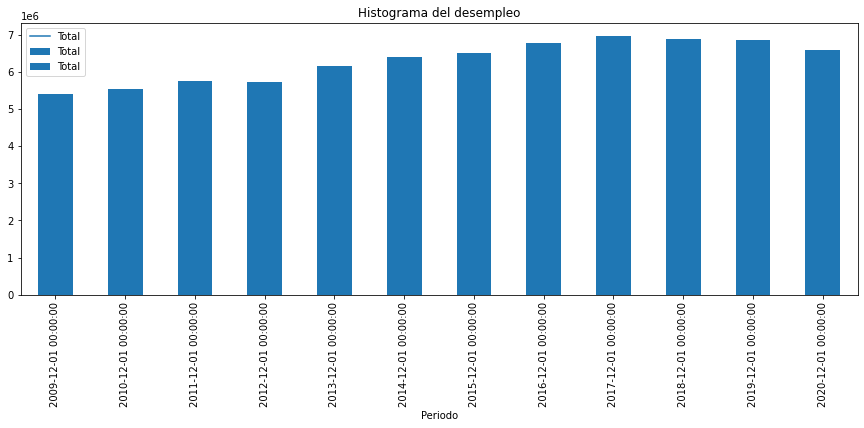

In [53]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,5))
ax = plt.gca()
resume_empleados.plot(ax=ax, figsize=(15,5))
resume_empleados.plot(ax=ax, kind='bar', figsize=(15,5))
plt.title('Histograma del desempleo')
plot1= resume_empleados.plot(ax=ax, kind='bar', figsize=(15,5))

**Reportes con DataPane**

---



Los informes de Datapane son flexibles y también pueden contener páginas, pestañas, desplegables y mucho más. Una vez creados, los informes pueden subirse a la web, generarse dinámicamente en la nube o incrustarse en su propia aplicación, donde sus espectadores pueden interactuar con sus datos y visualizaciones. 

In [34]:
import datapane as dp
def report_data(plot1,data,name):
  dp.Report(
    dp.Text(name),
    dp.Plot(plot1),
    dp.DataTable(data)
    ).save(path=name)


In [56]:
report_data(plot1,empleados_category,'EmpleEcuador.html')


Report saved to ./EmpleEcuador.html. To upload and share your report, create a free Datapane account by running `datapane signup`.


In [36]:
report_data(plot2,empleados_category,'EmpleoEc.html')

Report saved to ./EmpleoEc.html. To upload and share your report, create a free Datapane account by running `datapane signup`.
